In [1]:
from Bio import SeqIO
from Bio.Blast import NCBIWWW, NCBIXML
from pathlib import Path
import random
import os


In [2]:
dog_fragments_path = "../ancient_dna/ancient_dog_fragments.fasta"
dog_fragments = list(SeqIO.parse(dog_fragments_path, "fasta"))

print(f"Loaded {len(dog_fragments)} ancient dog fragments.")
print("Example fragment:")
print(dog_fragments[0].format("fasta"))


Loaded 1000 ancient dog fragments.
Example fragment:
>ancient_dog_frag_0 From NW_023329763.1, pos 13615-13688
GCTCATTTGGCTCCCCACTTGGGAATcaacctggacgtggtgactcttttTCACCACAGG
GGGCCTTCACCGG



In [4]:
from Bio.Align import PairwiseAligner

# Set up aligner once
aligner = PairwiseAligner()
aligner.mode = 'local'
aligner.match_score = 2
aligner.mismatch_score = -1
aligner.open_gap_score = -0.5
aligner.extend_gap_score = -0.1

# Use aligner instead of pairwise2
def best_gene_match(fragment_seq, genes):
    best_score = -float("inf")
    best_gene = None

    for gene in genes:
        alignments = aligner.align(gene.seq, fragment_seq)
        if alignments:
            score = alignments[0].score
            if score > best_score:
                best_score = score
                best_gene = gene.description
    return best_gene, best_score



In [5]:
for i, fragment in enumerate(dog_fragments[:5]):
    gene, score = best_gene_match(fragment.seq, known_genes)
    print(f"Fragment {i+1} best matches: {gene} (Score: {score:.2f})")


Fragment 1 best matches: gene_COX1 mitochondrially encoded cytochrome c oxidase I (Score: 58.00)
Fragment 2 best matches: gene_CYTB cytochrome b (Score: 59.50)
Fragment 3 best matches: gene_ATP6 ATP synthase membrane subunit 6 (Score: 4.60)
Fragment 4 best matches: gene_CYTB cytochrome b (Score: 26.00)
Fragment 5 best matches: gene_CYTB cytochrome b (Score: 91.30)


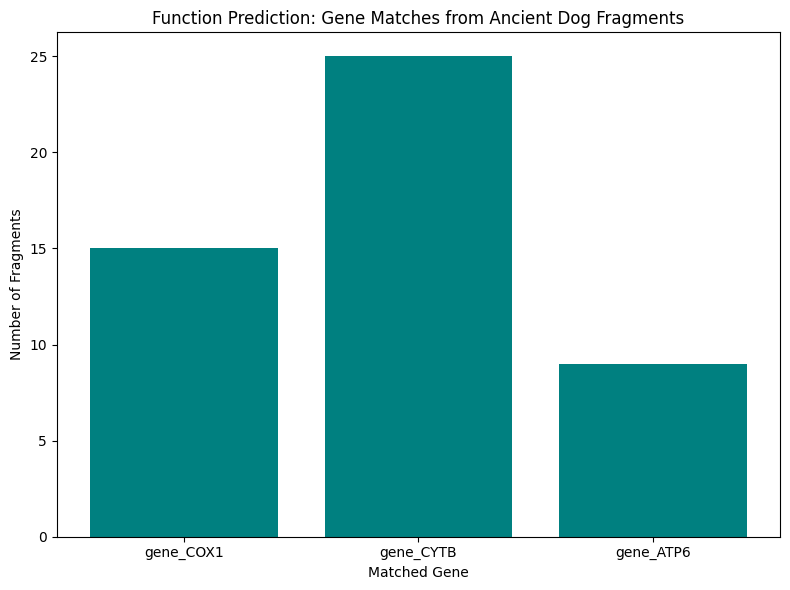

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

# Collect best match names from the first N fragments
top_matches = []
for fragment in dog_fragments[:50]:  # or [:100] if you want
    gene, score = best_gene_match(fragment.seq, known_genes)
    if gene is not None:
        top_matches.append(gene.split()[0])  # e.g., "gene_COX1"

# Count how many fragments matched each gene
match_counts = Counter(top_matches)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(match_counts.keys(), match_counts.values(), color='teal')
plt.xlabel("Matched Gene")
plt.ylabel("Number of Fragments")
plt.title("Function Prediction: Gene Matches from Ancient Dog Fragments")
plt.tight_layout()
plt.savefig("../plots/dog_function_prediction_hits.png", dpi=300)
plt.show()


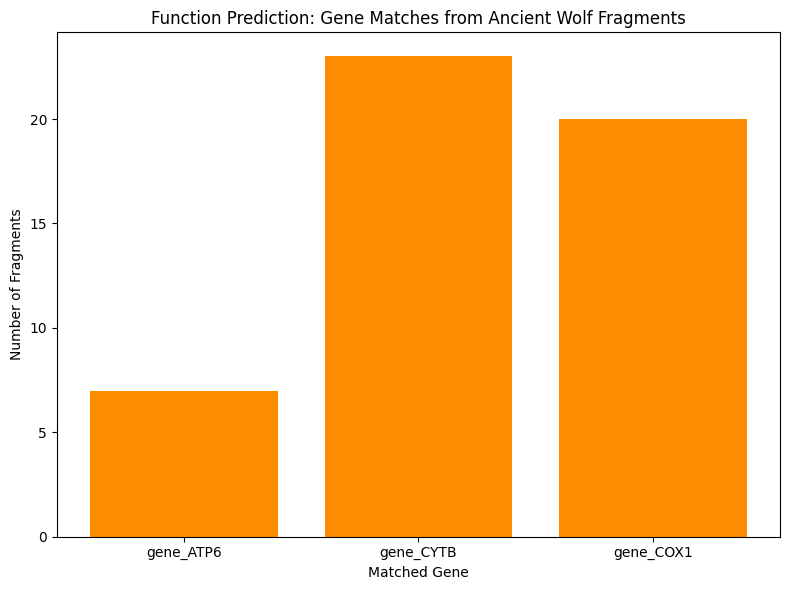

In [8]:
# Load Wolf fragments
wolf_fragments_path = "../ancient_dna/ancient_wolf_fragments.fasta"
wolf_fragments = list(SeqIO.parse(wolf_fragments_path, "fasta"))

# Collect gene hits
wolf_top_matches = []
for fragment in wolf_fragments[:50]:  # or [:100]
    gene, score = best_gene_match(fragment.seq, known_genes)
    if gene is not None:
        wolf_top_matches.append(gene.split()[0])

# Count
wolf_match_counts = Counter(wolf_top_matches)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(wolf_match_counts.keys(), wolf_match_counts.values(), color='darkorange')
plt.xlabel("Matched Gene")
plt.ylabel("Number of Fragments")
plt.title("Function Prediction: Gene Matches from Ancient Wolf Fragments")
plt.tight_layout()
plt.savefig("../plots/wolf_function_prediction_hits.png", dpi=300)
plt.show()
